In [13]:

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np




In [14]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [15]:
def build_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.GlobalAveragePooling2D(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [16]:

model_no_aug = build_cnn_model()
history_no_aug = model_no_aug.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=2
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
782/782 - 10s - 12ms/step - accuracy: 0.3123 - loss: 1.8074 - val_accuracy: 0.3878 - val_loss: 1.6807
Epoch 2/20
782/782 - 3s - 4ms/step - accuracy: 0.4379 - loss: 1.5150 - val_accuracy: 0.4717 - val_loss: 1.4394
Epoch 3/20
782/782 - 4s - 5ms/step - accuracy: 0.5039 - loss: 1.3533 - val_accuracy: 0.5227 - val_loss: 1.3110
Epoch 4/20
782/782 - 5s - 6ms/step - accuracy: 0.5486 - loss: 1.2445 - val_accuracy: 0.5555 - val_loss: 1.2077
Epoch 5/20
782/782 - 5s - 7ms/step - accuracy: 0.5790 - loss: 1.1660 - val_accuracy: 0.5959 - val_loss: 1.1254
Epoch 6/20
782/782 - 4s - 5ms/step - accuracy: 0.6040 - loss: 1.1024 - val_accuracy: 0.6092 - val_loss: 1.0994
Epoch 7/20
782/782 - 4s - 5ms/step - accuracy: 0.6224 - loss: 1.0504 - val_accuracy: 0.6251 - val_loss: 1.0451
Epoch 8/20
782/782 - 4s - 4ms/step - accuracy: 0.6407 - loss: 1.0102 - val_accuracy: 0.6318 - val_loss: 1.0194
Epoch 9/20
782/782 - 4s - 5ms/step - accuracy: 0.6550 - loss: 0.9703 - val_accuracy: 0.6361 - val_loss: 1.0157

In [17]:

datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen_aug.fit(x_train)

model_aug = build_cnn_model()
history_aug = model_aug.fit(
    datagen_aug.flow(x_train, y_train, batch_size=64),
    steps_per_epoch=len(x_train) // 64,
    epochs=20,
    validation_data=(x_test, y_test),
    verbose=2
)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 - 32s - 41ms/step - accuracy: 0.3016 - loss: 1.8508 - val_accuracy: 0.3777 - val_loss: 1.6516
Epoch 2/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 - 1s - 2ms/step - accuracy: 0.2812 - loss: 1.6429 - val_accuracy: 0.3682 - val_loss: 1.6801
Epoch 3/20
781/781 - 27s - 35ms/step - accuracy: 0.4209 - loss: 1.5710 - val_accuracy: 0.4552 - val_loss: 1.4847
Epoch 4/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 - 1s - 935us/step - accuracy: 0.5938 - loss: 1.3886 - val_accuracy: 0.4487 - val_loss: 1.5037
Epoch 5/20
781/781 - 40s - 51ms/step - accuracy: 0.4797 - loss: 1.4248 - val_accuracy: 0.4908 - val_loss: 1.4045
Epoch 6/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 - 1s - 1ms/step - accuracy: 0.5625 - loss: 1.2950 - val_accuracy: 0.4935 - val_loss: 1.4019
Epoch 7/20
781/781 - 41s - 53ms/step - accuracy: 0.5144 - loss: 1.3278 - val_accuracy: 0.5365 - val_loss: 1.2764
Epoch 8/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 - 1s - 2ms/step - accuracy: 0.5781 - loss: 1.3801 - val_accuracy: 0.5361 - val_loss: 1.2854
Epoch 9/20
781/781 - 39s - 50ms/step - accuracy: 0.5447 - loss: 1.2548 - val_accuracy: 0.5277 - val_loss: 1.3144
Epoch 10/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 - 1s - 972us/step - accuracy: 0.4844 - loss: 1.3687 - val_accuracy: 0.5484 - val_loss: 1.2596
Epoch 11/20
781/781 - 27s - 35ms/step - accuracy: 0.5719 - loss: 1.1922 - val_accuracy: 0.5942 - val_loss: 1.1450
Epoch 12/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 - 1s - 1ms/step - accuracy: 0.5625 - loss: 1.1797 - val_accuracy: 0.5820 - val_loss: 1.1759
Epoch 13/20
781/781 - 27s - 35ms/step - accuracy: 0.5930 - loss: 1.1419 - val_accuracy: 0.5954 - val_loss: 1.1398
Epoch 14/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 - 1s - 2ms/step - accuracy: 0.6094 - loss: 1.2106 - val_accuracy: 0.5991 - val_loss: 1.1283
Epoch 15/20
781/781 - 27s - 35ms/step - accuracy: 0.6061 - loss: 1.1049 - val_accuracy: 0.6322 - val_loss: 1.0451
Epoch 16/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 - 1s - 1ms/step - accuracy: 0.6250 - loss: 1.0282 - val_accuracy: 0.6222 - val_loss: 1.0828
Epoch 17/20
781/781 - 41s - 52ms/step - accuracy: 0.6192 - loss: 1.0718 - val_accuracy: 0.6095 - val_loss: 1.1135
Epoch 18/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 - 1s - 945us/step - accuracy: 0.5781 - loss: 1.0489 - val_accuracy: 0.6224 - val_loss: 1.0724
Epoch 19/20
781/781 - 40s - 51ms/step - accuracy: 0.6330 - loss: 1.0323 - val_accuracy: 0.6387 - val_loss: 1.0246
Epoch 20/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 - 1s - 2ms/step - accuracy: 0.6094 - loss: 1.2331 - val_accuracy: 0.6447 - val_loss: 1.0003


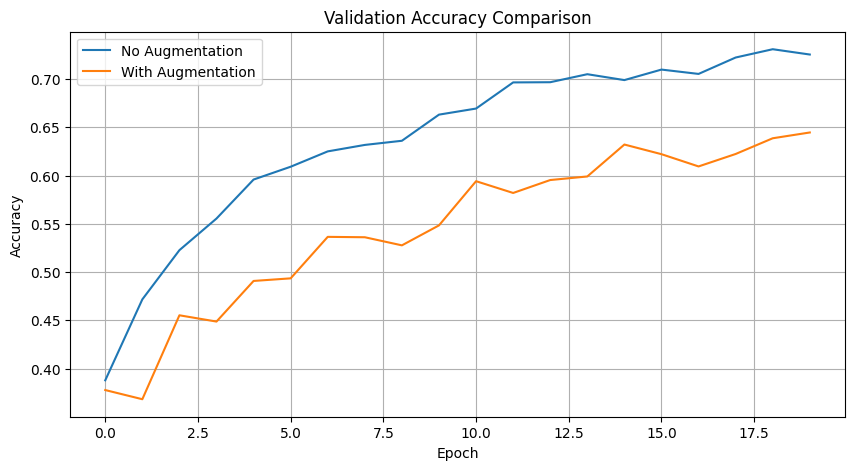

In [18]:

plt.figure(figsize=(10, 5))
plt.plot(history_no_aug.history['val_accuracy'], label='No Augmentation')
plt.plot(history_aug.history['val_accuracy'], label='With Augmentation')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



In [19]:

test_acc_no_aug = model_no_aug.evaluate(x_test, y_test, verbose=0)[1]
test_acc_aug = model_aug.evaluate(x_test, y_test, verbose=0)[1]

print(f"🔵 Final Test Accuracy (No Aug):     {test_acc_no_aug:.4f}")
print(f"🟢 Final Test Accuracy (With Aug):  {test_acc_aug:.4f}")


🔵 Final Test Accuracy (No Aug):     0.7255
🟢 Final Test Accuracy (With Aug):  0.6447
